In [15]:
%matplotlib inline
import pandas as pd
import pylab as plt
import numpy as np
import statistics
from collections import defaultdict, Counter

## Section 1

In [2]:
movies = pd.read_csv('movie_metadata.csv' , encoding='latin-1')

In [3]:
movies.head()

,director_name,director_facebook_likes,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,budget,title_year,movie_facebook_likes
0,Gordon-Levitt,23000,23000,Comedy,Joseph Gordon-Levitt,Don Jon,44265,3000000,2013,33000
1,Nolan,22000,23000,Action,Christian Bale,Batman Begins,59558,150000000,2005,15000
2,Nolan,22000,29000,Action,Leonardo DiCaprio,Inception,81115,160000000,2010,175000
3,Nolan,22000,23000,Action,Christian Bale,The Dark Knight,57802,185000000,2008,37000
4,Nolan,22000,27000,Action,Tom Hardy,The Dark Knight Rises,106759,250000000,2012,164000


In [4]:
pd.isnull(movies).any()

director_name                False
director_facebook_likes      False
actor_1_facebook_likes       False
genres                       False
actor_1_name                 False
movie_title                  False
cast_total_facebook_likes    False
budget                       False
title_year                   False
movie_facebook_likes         False
dtype: bool

In [5]:
movies.budget.describe()

count    3.086000e+03
mean     3.825183e+07
std      4.360677e+07
min      2.180000e+02
25%      8.000000e+06
50%      2.400000e+07
75%      5.000000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [6]:
movies.groupby(['genres']).count()

,director_name,director_facebook_likes,actor_1_facebook_likes,actor_1_name,movie_title,cast_total_facebook_likes,budget,title_year,movie_facebook_likes
genres,,,,,,,,,
Action,738,738,738,738,738,738,738,738,738
Animation,173,173,173,173,173,173,173,173,173
Biography,132,132,132,132,132,132,132,132,132
Comedy,1256,1256,1256,1256,1256,1256,1256,1256,1256
Drama,787,787,787,787,787,787,787,787,787


In [8]:
movies.loc[movies["budget"]>200000000]

,director_name,director_facebook_likes,actor_1_facebook_likes,genres,actor_1_name,movie_title,cast_total_facebook_likes,budget,title_year,movie_facebook_likes
4,Nolan,22000,27000,Action,Tom Hardy,The Dark Knight Rises,106759,250000000,2012,164000
332,Gore Verbinski,563,40000,Action,Johnny Depp,Pirates of the Caribbean: At World's End,48350,300000000,2007,0
333,Gore Verbinski,563,40000,Action,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,48486,225000000,2006,5000
335,Gore Verbinski,563,40000,Action,Johnny Depp,The Lone Ranger,45757,215000000,2013,48000
362,Peter Berg,532,14000,Action,Liam Neeson,Battleship,26679,209000000,2012,44000
422,Andrew Stanton,475,640,Action,Daryl Sabara,John Carter,1873,263700000,2012,24000
440,Marc Webb,464,15000,Action,Emma Stone,The Amazing Spider-Man,28489,230000000,2012,56000
733,Rob Marshall,252,40000,Action,Johnny Depp,Pirates of the Caribbean: On Stranger Tides,54083,250000000,2011,58000
877,Barry Sonnenfeld,188,10000,Comedy,Will Smith,Men in Black 3,12572,225000000,2012,40000
1270,Anthony Russo,94,21000,Action,Robert Downey Jr.,Captain America: Civil War,64798,250000000,2016,72000


In [17]:
movie_genres = movies.groupby(['genres'])


In [10]:
print(movie_genres)

genres      Action  Animation  Biography  Comedy  Drama
title_year                                             
1916             0          0          0       0      1
1920             0          0          0       0      1
1925             0          0          0       0      1
1930             0          0          0       0      1
1932             0          0          0       0      1
1933             0          0          0       2      0
1934             0          0          0       1      0
1935             0          0          0       1      0
1936             1          0          0       1      0
1937             0          1          0       0      0
1938             0          0          0       1      1
1939             1          0          0       1      1
1940             1          2          0       0      1
1941             0          0          0       0      1
1942             0          0          0       0      1
1943             0          0          0       0

In [18]:
movies.groupby(['genres']).mean()

,director_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,budget,title_year,movie_facebook_likes
genres,,,,,,
Action,1129.334688,10203.397019,15680.949864,6.567366e+07,2002.394309,14923.955285
Animation,238.323699,7322.687861,11202.421965,8.286723e+07,2005.329480,8374.017341
Biography,2322.037879,8782.303030,12413.257576,2.653698e+07,2002.325758,10732.871212
Comedy,547.512739,6863.755573,10197.339172,2.716144e+07,2002.214968,5021.738854
Drama,1118.735705,7827.208386,11254.970775,2.239428e+07,2000.147395,8351.546379


In [30]:
movie_genre_budget = movies.groupby(['genres'])['budget']
movie_genre_mean = movie_genre_budget.mean()
print(movie_genre_mean)

genres
Action       6.567366e+07
Animation    8.286723e+07
Biography    2.653698e+07
Comedy       2.716144e+07
Drama        2.239428e+07
Name: budget, dtype: float64


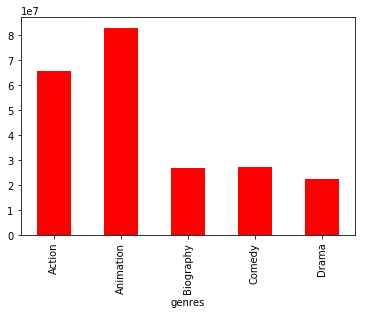

In [31]:
movie_genre_mean.plot(kind='bar',color = "red")

In [33]:
data = movies[['actor_1_name','budget']]
correlation = data.corr(method='pearson')
print(correlation)

        budget
budget     1.0


In [35]:
movies['movie_facebook_likes'].corr(movies['budget'])

0.36506344141949293